<a href="https://colab.research.google.com/github/rouchdi-tech/cours-IA-/blob/main/partie1ROUCHDI_AMINE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP PARTIE1 — STATISTIQUES ET LOI NORMALE EN FINANCE
Analyse risque portefeuille et calcul VaR


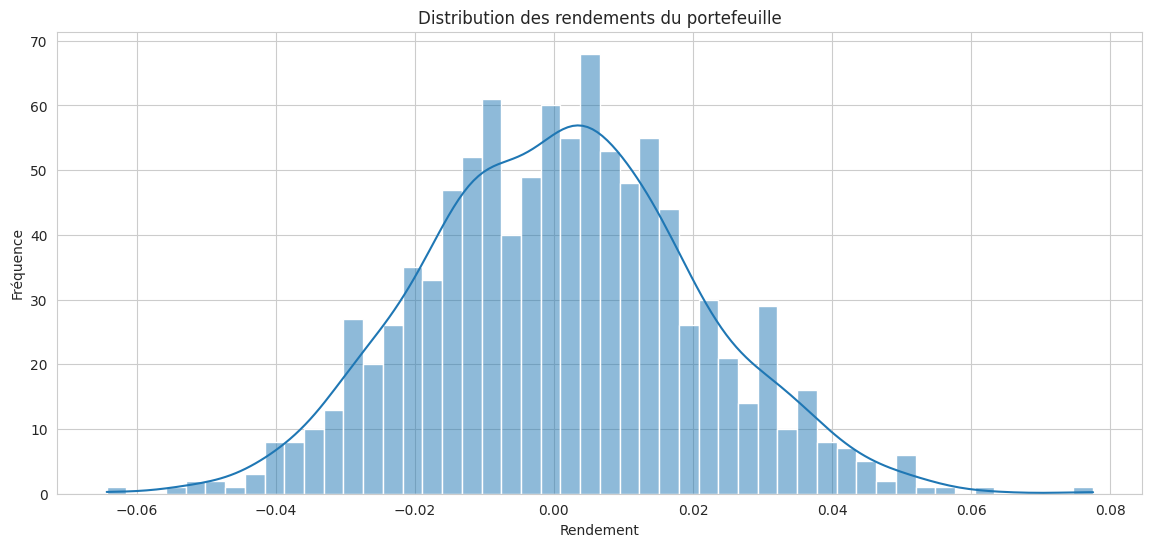

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration de l'affichage des graphiques
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("="*80)
print("TP PARTIE1 — STATISTIQUES ET LOI NORMALE EN FINANCE")
print("Analyse risque portefeuille et calcul VaR")
print("="*80)

# --- Exemple de mise en place de données pour la suite du TP ---
# Génération de rendements simulés pour un portefeuille
np.random.seed(42)
rendements = np.random.normal(0.0005, 0.02, 1000) # Moyenne 0.05%, Vol 2%
df = pd.DataFrame(rendements, columns=['Rendement'])

# Visualisation rapide
plt.figure()
sns.histplot(df['Rendement'], kde=True, bins=50)
plt.title("Distribution des rendements du portefeuille")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.show()

In [ ]:
# --- Données Historiques ---
# Rendements mensuels historiques (%)
rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])

rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

# --- Paramètres d'Analyse ---
capital = 500000              # Capital à investir en €
perte_max_toleree = 50000     # Seuil de tolérance au risque (10%)
taux_sans_risque_annuel = 3.0 # % annuel (ex: OAT 10 ans)

# Conversion du taux sans risque en mensuel pour la cohérence avec les données
taux_sans_risque_mensuel = taux_sans_risque_annuel / 12

print(f"Configuration chargée : Capital de {capital:,} €")
print(f"Seuil de perte maximale : {perte_max_toleree:,} €")

Configuration chargée : Capital de 500,000 €
Seuil de perte maximale : 50,000 €


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration préalable (si non faite)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# ============================================================================
# QUESTION 1.1 — STATISTIQUES DESCRIPTIVES
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.1 — STATISTIQUES DESCRIPTIVES")
print("="*80)

def calculer_stats_portefeuille(rendements, nom):
    """ Calcule statistiques descriptives portefeuille """
    # a) Moyenne mensuelle
    moyenne_mensuelle = np.mean(rendements)

    # b) Écart-type mensuel
    ecart_type_mensuel = np.std(rendements, ddof=1)

    # c) Médiane
    mediane = np.median(rendements)

    # d) Rendement annualisé (capitalisation composée)
    rendement_annuel = ((1 + moyenne_mensuelle/100)**12 - 1) * 100

    # e) Volatilité annualisée
    volatilite_annuelle = ecart_type_mensuel * np.sqrt(12)

    return {
        'nom': nom,
        'moyenne_mensuelle': moyenne_mensuelle,
        'ecart_type_mensuel': ecart_type_mensuel,
        'mediane': mediane,
        'rendement_annuel': rendement_annuel,
        'volatilite_annuelle': volatilite_annuelle
    }

# Calcul stats pour les deux portefeuilles
stats_A = calculer_stats_portefeuille(rendements_A, "CONSERVATEUR (A)")
stats_B = calculer_stats_portefeuille(rendements_B, "AGRESSIF (B)")

# Affichage résultats
for s in [stats_A, stats_B]:
    print(f"\n📊 PORTEFEUILLE {s['nom']}")
    print(f"   • Rendement mensuel moyen : {s['moyenne_mensuelle']:.2f}%")
    print(f"   • Écart-type mensuel : {s['ecart_type_mensuel']:.2f}%")
    print(f"   • Médiane : {s['mediane']:.2f}%")
    print(f"   • Rendement annualisé : {s['rendement_annuel']:.2f}%")
    print(f"   • Volatilité annualisée : {s['volatilite_annuelle']:.2f}%")


QUESTION 1.1 — STATISTIQUES DESCRIPTIVES

📊 PORTEFEUILLE CONSERVATEUR (A)
   • Rendement mensuel moyen : 0.94%
   • Écart-type mensuel : 0.48%
   • Médiane : 1.00%
   • Rendement annualisé : 11.85%
   • Volatilité annualisée : 1.65%

📊 PORTEFEUILLE AGRESSIF (B)
   • Rendement mensuel moyen : 2.89%
   • Écart-type mensuel : 4.45%
   • Médiane : 4.70%
   • Rendement annualisé : 40.79%
   • Volatilité annualisée : 15.41%



QUESTION 1.2 — VISUALISATION DISTRIBUTIONS


/tmp/ipython-input-389552541.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Portefeuille A', 'Portefeuille B'])


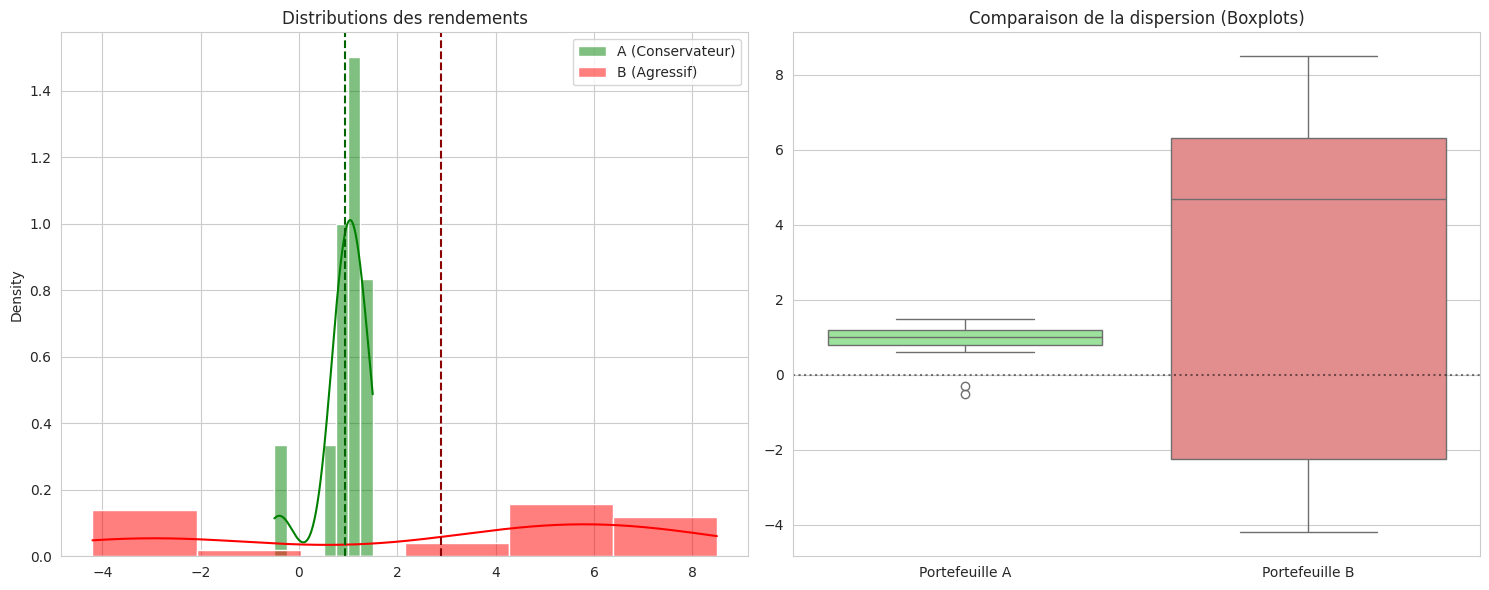


QUESTION 1.3 — VALUE AT RISK (VaR 95%)
🚨 PERTE MAX TOLÉRÉE : €50,000
📉 VaR 95% Annuelle A : €45,649
📉 VaR 95% Annuelle B : €77,231


In [ ]:
print("\n" + "="*80)
print("QUESTION 1.2 — VISUALISATION DISTRIBUTIONS")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1 : Histogrammes
ax1 = axes[0]
sns.histplot(rendements_A, color='green', label='A (Conservateur)', kde=True, stat="density", ax=ax1)
sns.histplot(rendements_B, color='red', label='B (Agressif)', kde=True, stat="density", ax=ax1)
ax1.axvline(stats_A['moyenne_mensuelle'], color='darkgreen', linestyle='--')
ax1.axvline(stats_B['moyenne_mensuelle'], color='darkred', linestyle='--')
ax1.set_title('Distributions des rendements')
ax1.legend()

# Subplot 2 : Boxplots
ax2 = axes[1]
sns.boxplot(data=[rendements_A, rendements_B], palette=['lightgreen', 'lightcoral'], ax=ax2)
ax2.set_xticklabels(['Portefeuille A', 'Portefeuille B'])
ax2.set_title('Comparaison de la dispersion (Boxplots)')
ax2.axhline(0, color='black', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

# ============================================================================
# QUESTION 1.3 — VALUE AT RISK (VaR 95%)
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.3 — VALUE AT RISK (VaR 95%)")
print("="*80)

def calculer_var_portefeuille(stats_dict, capital, alpha=0.05):
    z_alpha = stats.norm.ppf(alpha) # ≈ -1.645 pour 95%

    # VaR mensuelle et annuelle (%)
    var_m_pct = stats_dict['moyenne_mensuelle'] + z_alpha * stats_dict['ecart_type_mensuel']
    var_a_pct = stats_dict['rendement_annuel'] + z_alpha * stats_dict['volatilite_annuelle']

    return {
        'var_m_eur': capital * (var_m_pct / 100),
        'var_a_eur': capital * (var_a_pct / 100),
        'var_m_pct': var_m_pct,
        'var_a_pct': var_a_pct
    }

var_A = calculer_var_portefeuille(stats_A, capital)
var_B = calculer_var_portefeuille(stats_B, capital)

print(f"🚨 PERTE MAX TOLÉRÉE : €{perte_max_toleree:,.0f}")
print(f"📉 VaR 95% Annuelle A : €{var_A['var_a_eur']:,.0f}")
print(f"📉 VaR 95% Annuelle B : €{var_B['var_a_eur']:,.0f}")

# Tests de Normalité
_, p_A = stats.shapiro(rendements_A)
_, p_B = stats.shapiro(rendements_B)

In [ ]:
print("\n" + "="*80)
print("QUESTION 1.3 — VALUE AT RISK (VaR 95%)")
print("="*80)

def calculer_var_portefeuille(stats_dict, capital, alpha=0.05):
    z_alpha = stats.norm.ppf(alpha) # ≈ -1.645 pour 95%

    # VaR mensuelle et annuelle (%)
    var_m_pct = stats_dict['moyenne_mensuelle'] + z_alpha * stats_dict['ecart_type_mensuel']
    var_a_pct = stats_dict['rendement_annuel'] + z_alpha * stats_dict['volatilite_annuelle']

    return {
        'var_m_eur': capital * (var_m_pct / 100),
        'var_a_eur': capital * (var_a_pct / 100),
        'var_m_pct': var_m_pct,
        'var_a_pct': var_a_pct
    }

var_A = calculer_var_portefeuille(stats_A, capital)
var_B = calculer_var_portefeuille(stats_B, capital)

print(f"🚨 PERTE MAX TOLÉRÉE : €{perte_max_toleree:,.0f}")
print(f"📉 VaR 95% Annuelle A : €{var_A['var_a_eur']:,.0f}")
print(f"📉 VaR 95% Annuelle B : €{var_B['var_a_eur']:,.0f}")

# Tests de Normalité
_, p_A = stats.shapiro(rendements_A)
_, p_B = stats.shapiro(rendements_B)


QUESTION 1.3 — VALUE AT RISK (VaR 95%)
🚨 PERTE MAX TOLÉRÉE : €50,000
📉 VaR 95% Annuelle A : €45,649
📉 VaR 95% Annuelle B : €77,231


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
sns.set_style("whitegrid")

print("="*80)
print("TP PARTIE 2 — THÉORÈME DE BAYES ET SCORING CRÉDIT")
print("Mise à jour probabilités risque avec nouvelles informations")
print("="*80)

# ============================================================================
# DONNÉES
# ============================================================================

# Taux défaut base et segmentation
taux_defaut_base = 0.05  # 5%

segments = {
    'Premium': {'proportion': 0.30, 'taux_defaut': 0.015},
    'Standard': {'proportion': 0.50, 'taux_defaut': 0.05},
    'Risque': {'proportion': 0.20, 'taux_defaut': 0.15}
}

# Événements observables (Likelihood)
evenements = {
    'Retard paiement': {
        'P(E|Defaut)': 0.80,
        'P(E|Non-defaut)': 0.10
    },
    'Decouvert >500€': {
        'P(E|Defaut)': 0.65,
        'P(E|Non-defaut)': 0.15
    },
    'Refus credit ailleurs': {
        'P(E|Defaut)': 0.55,
        'P(E|Non-defaut)': 0.08
    }
}

# ============================================================================
# QUESTION 2.1 — CALCUL BAYES MANUEL
# ============================================================================

print("\n" + "="*80)
print("QUESTION 2.1 — CALCUL BAYES MANUEL")
print("="*80)
print("\n📋 CONTEXTE :")
print("   Client Segment Standard présente un RETARD PAIEMENT")
print(f"   • Prior P(Défaut) = {segments['Standard']['taux_defaut']:.1%}")
print(f"   • P(Retard|Défaut) = {evenements['Retard paiement']['P(E|Defaut)']:.0%}")
print(f"   • P(Retard|Non-défaut) = {evenements['Retard paiement']['P(E|Non-defaut)']:.0%}")

# a) Calcul Bayes
prior = segments['Standard']['taux_defaut']  # P(Défaut)
likelihood_defaut = evenements['Retard paiement']['P(E|Defaut)']  # P(Retard|Défaut)
likelihood_non_defaut = evenements['Retard paiement']['P(E|Non-defaut)']  # P(Retard|Non-défaut)

# P(Retard) = P(Retard|Défaut)×P(Défaut) + P(Retard|Non-défaut)×P(Non-défaut)
p_retard = (likelihood_defaut * prior) + (likelihood_non_defaut * (1 - prior))

# P(Défaut|Retard) = P(Retard|Défaut) × P(Défaut) / P(Retard)
posterior = (likelihood_defaut * prior) / p_retard

print(f"\n🧮 CALCUL DÉTAILLÉ BAYES :")
print(f"\n   Étape 1 : Calcul P(Retard) via loi probabilités totales")
print(f"   P(Retard) = {likelihood_defaut:.2f} × {prior:.2f} + {likelihood_non_defaut:.2f} × {1-prior:.2f}")
print(f"   P(Retard) = {likelihood_defaut * prior:.4f} + {likelihood_non_defaut * (1-prior):.4f}")
print(f"   P(Retard) = {p_retard:.4f} = {p_retard:.2%}")

print(f"\n   Étape 2 : Théorème de Bayes")
print(f"   P(Défaut|Retard) = ({likelihood_defaut:.2f} × {prior:.2f}) / {p_retard:.4f}")
print(f"   P(Défaut|Retard) = {likelihood_defaut * prior:.4f} / {p_retard:.4f}")
print(f"   P(Défaut|Retard) = {posterior:.4f} = {posterior:.2%}")

# b) Interprétation facteur multiplicatif
facteur_multiplication = posterior / prior
print(f"\n📊 INTERPRÉTATION :")
print(f"   • Prior (avant retard) : {prior:.1%}")
print(f"   • Posterior (après retard) : {posterior:.1%}")
print(f"   • Augmentation risque : {(posterior - prior)*100:.1f} points")
print(f"   • Facteur multiplication : ×{facteur_multiplication:.2f}")
print(f"   → Retard paiement MULTIPLIE risque défaut par {facteur_multiplication:.1f} !")

# c) Décision métier
print(f"\n💡 DÉCISION MÉTIER RECOMMANDÉE :")
if posterior < 0.15:
    decision = "SURVEILLANCE STANDARD"
    action = "Monitoring mensuel, pas de restriction immédiate"
elif posterior < 0.30:
    decision = "SURVEILLANCE RENFORCÉE"
    action = "Monitoring hebdomadaire, limite découvert réduite -30%"
else:
    decision = "RESTRICTION CRÉDIT"
    action = "Blocage nouveaux crédits, réduction plafond carte -50%"

print(f"   ✓ DÉCISION : {decision}")
print(f"   ✓ ACTION : {action}")
print(f"   ✓ JUSTIFICATION : Posterior {posterior:.1%} franchit le seuil d'alerte approprié.")

TP PARTIE 2 — THÉORÈME DE BAYES ET SCORING CRÉDIT
Mise à jour probabilités risque avec nouvelles informations

QUESTION 2.1 — CALCUL BAYES MANUEL

📋 CONTEXTE :
   Client Segment Standard présente un RETARD PAIEMENT
   • Prior P(Défaut) = 5.0%
   • P(Retard|Défaut) = 80%
   • P(Retard|Non-défaut) = 10%

🧮 CALCUL DÉTAILLÉ BAYES :

   Étape 1 : Calcul P(Retard) via loi probabilités totales
   P(Retard) = 0.80 × 0.05 + 0.10 × 0.95
   P(Retard) = 0.0400 + 0.0950
   P(Retard) = 0.1350 = 13.50%

   Étape 2 : Théorème de Bayes
   P(Défaut|Retard) = (0.80 × 0.05) / 0.1350
   P(Défaut|Retard) = 0.0400 / 0.1350
   P(Défaut|Retard) = 0.2963 = 29.63%

📊 INTERPRÉTATION :
   • Prior (avant retard) : 5.0%
   • Posterior (après retard) : 29.6%
   • Augmentation risque : 24.6 points
   • Facteur multiplication : ×5.93
   → Retard paiement MULTIPLIE risque défaut par 5.9 !

💡 DÉCISION MÉTIER RECOMMANDÉE :
   ✓ DÉCISION : SURVEILLANCE RENFORCÉE
   ✓ ACTION : Monitoring hebdomadaire, limite découvert rédui


QUESTION 2.2 — MISE À JOUR SÉQUENTIELLE

📋 CONTEXTE :
   2 semaines après, le même client présente un DÉCOUVERT >500€
   → Utilisation du posterior Q2.1 comme nouveau prior

🧮 CALCUL BAYES (ÉVÉNEMENT 2 : DÉCOUVERT) :
   • Nouveau prior P(Défaut) = 0.2963 (= posterior Q2.1)
   • P(Découvert|Défaut) = 65%
   • P(Découvert|Non-défaut) = 15%

   P(Découvert) = 0.65 × 0.2963 + 0.15 × 0.7037
   P(Découvert) = 0.2981

   P(Défaut|Retard ET Découvert) = (0.65 × 0.2963) / 0.2981
   P(Défaut|Retard ET Découvert) = 0.6460 = 64.60%

📊 ÉVOLUTION PROBABILITÉ DÉFAUT :
   Étape 0 (Prior initial)    : 5.0%
   Étape 1 (Après Retard)     : 29.6% (+24.6 pts)
   Étape 2 (Après Découvert)  : 64.6% (+35.0 pts)
   → TOTAL : augmentation du risque par un facteur de ×12.92


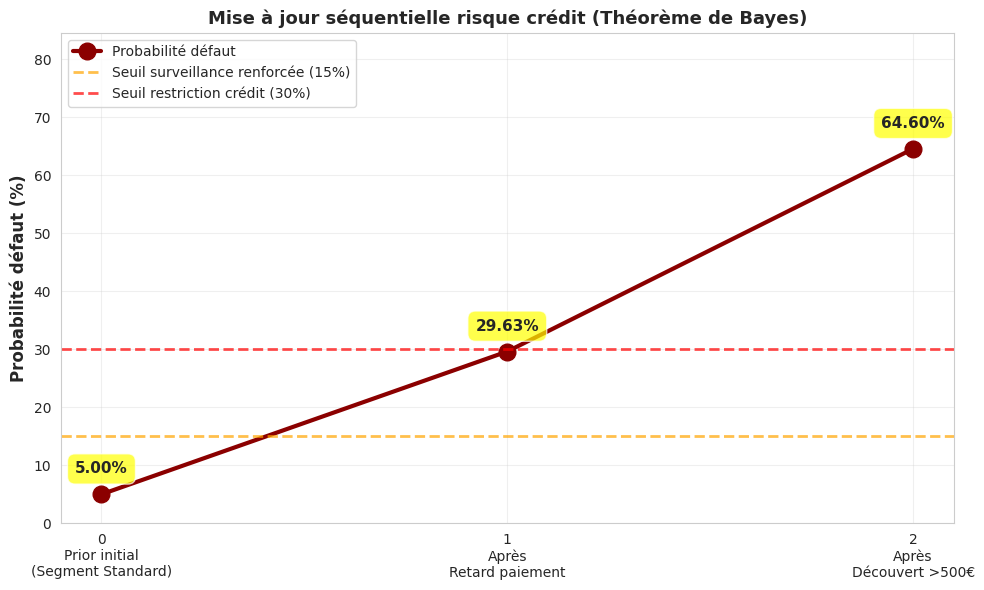


✓ Graphique d'évolution de probabilité généré avec succès.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration (Assurez-vous que les variables de la Q2.1 sont définies avant)
sns.set_style("whitegrid")

print("\n" + "="*80)
print("QUESTION 2.2 — MISE À JOUR SÉQUENTIELLE")
print("="*80)
print("\n📋 CONTEXTE :")
print("   2 semaines après, le même client présente un DÉCOUVERT >500€")
print("   → Utilisation du posterior Q2.1 comme nouveau prior")

# ============================================================================
# CALCULS
# ============================================================================

# a) Nouveau prior = posterior précédent (Q2.1)
# Note : 'posterior' et 'prior' doivent avoir été calculés dans la cellule précédente
prior_2 = posterior

# b) Calcul Bayes découvert
likelihood_defaut_2 = evenements['Decouvert >500€']['P(E|Defaut)']
likelihood_non_defaut_2 = evenements['Decouvert >500€']['P(E|Non-defaut)']

# Probabilité totale de l'événement "Découvert"
p_decouvert = (likelihood_defaut_2 * prior_2) + (likelihood_non_defaut_2 * (1 - prior_2))

# Nouveau Posterior (Probabilité de défaut sachant le retard ET le découvert)
posterior_2 = (likelihood_defaut_2 * prior_2) / p_decouvert

print(f"\n🧮 CALCUL BAYES (ÉVÉNEMENT 2 : DÉCOUVERT) :")
print(f"   • Nouveau prior P(Défaut) = {prior_2:.4f} (= posterior Q2.1)")
print(f"   • P(Découvert|Défaut) = {likelihood_defaut_2:.0%}")
print(f"   • P(Découvert|Non-défaut) = {likelihood_non_defaut_2:.0%}")

print(f"\n   P(Découvert) = {likelihood_defaut_2:.2f} × {prior_2:.4f} + {likelihood_non_defaut_2:.2f} × {1-prior_2:.4f}")
print(f"   P(Découvert) = {p_decouvert:.4f}")

print(f"\n   P(Défaut|Retard ET Découvert) = ({likelihood_defaut_2:.2f} × {prior_2:.4f}) / {p_decouvert:.4f}")
print(f"   P(Défaut|Retard ET Découvert) = {posterior_2:.4f} = {posterior_2:.2%}")

print(f"\n📊 ÉVOLUTION PROBABILITÉ DÉFAUT :")
print(f"   Étape 0 (Prior initial)    : {prior:.1%}")
print(f"   Étape 1 (Après Retard)     : {posterior:.1%} (+{(posterior-prior)*100:.1f} pts)")
print(f"   Étape 2 (Après Découvert)  : {posterior_2:.1%} (+{(posterior_2-posterior)*100:.1f} pts)")
print(f"   → TOTAL : augmentation du risque par un facteur de ×{posterior_2/prior:.2f}")

# ============================================================================
# c) GRAPHIQUE ÉVOLUTION
# ============================================================================

fig, ax = plt.subplots(figsize=(10, 6))

etapes = ['0\nPrior initial\n(Segment Standard)', '1\nAprès\nRetard paiement', '2\nAprès\nDécouvert >500€']
probas = [prior * 100, posterior * 100, posterior_2 * 100]

# Tracé de la ligne
ax.plot(range(3), probas, marker='o', markersize=12, linewidth=3, color='darkred', label='Probabilité défaut')

# Annotation des points
for i, proba in enumerate(probas):
    ax.annotate(f'{proba:.2f}%', xy=(i, proba), xytext=(0, 15),
                textcoords='offset points', ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Seuils de décision
ax.axhline(15, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Seuil surveillance renforcée (15%)')
ax.axhline(30, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Seuil restriction crédit (30%)')

# Mise en forme des axes
ax.set_xticks(range(3))
ax.set_xticklabels(etapes)
ax.set_ylim(0, max(probas) + 20) # Pour laisser de la place aux étiquettes
ax.set_ylabel('Probabilité défaut (%)', fontsize=12, fontweight='bold')
ax.set_title('Mise à jour séquentielle risque crédit (Théorème de Bayes)', fontsize=13, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Graphique d'évolution de probabilité généré avec succès.")

In [4]:
print("\n" + "="*80)
print("QUESTION 2.3 — FONCTION GÉNÉRIQUE BAYES")
print("="*80)

def bayes_update(prior, likelihood_pos, likelihood_neg):
    """
    Calcule la probabilité a posteriori via le théorème de Bayes.

    Formule : P(A|B) = P(B|A) × P(A) / P(B)
    Avec P(B) = P(B|A)×P(A) + P(B|¬A)×P(¬A)

    Parameters:
    -----------
    prior : float
        Probabilité a priori P(A) ∈ [0, 1].
        Exemple : 0.05 pour un taux de défaut de 5%.
    likelihood_pos : float
        Vraisemblance P(Evidence|Positive) ∈ [0, 1].
        Exemple : 0.80 pour P(Retard|Défaut).
    likelihood_neg : float
        Vraisemblance P(Evidence|Negative) ∈ [0, 1].
        Exemple : 0.10 pour P(Retard|Non-défaut).

    Returns:
    --------
    posterior : float
        Probabilité a posteriori P(A|B) ∈ [0, 1].
    """
    # Validation des entrées
    if not (0 <= prior <= 1):
        raise ValueError(f"prior doit être dans [0,1], reçu {prior}")
    if not (0 <= likelihood_pos <= 1):
        raise ValueError(f"likelihood_pos doit être dans [0,1], reçu {likelihood_pos}")
    if not (0 <= likelihood_neg <= 1):
        raise ValueError(f"likelihood_neg doit être dans [0,1], reçu {likelihood_neg}")

    # Calcul P(Evidence) via la loi des probabilités totales
    p_evidence = (likelihood_pos * prior) + (likelihood_neg * (1 - prior))

    # Protection contre la division par zéro
    if p_evidence == 0:
        return 0.0

    # Théorème de Bayes
    posterior = (likelihood_pos * prior) / p_evidence
    return posterior

print("\n✓ Fonction bayes_update() créée avec docstring complète")

# ============================================================================
# TEST DE LA FONCTION — Client Segment Risque
# ============================================================================

# On suppose que 'segments' et 'evenements' sont définis comme précédemment
prior_risque = segments['Risque']['taux_defaut']
resultats_risque = {'Prior initial': prior_risque}

print(f"\n🧪 TEST FONCTION — Client Segment RISQUE (prior défaut {prior_risque:.0%})")

# Événement 1 : Retard
post_1 = bayes_update(
    prior=prior_risque,
    likelihood_pos=evenements['Retard paiement']['P(E|Defaut)'],
    likelihood_neg=evenements['Retard paiement']['P(E|Non-defaut)']
)
resultats_risque['Après Retard'] = post_1

# Événement 2 : Découvert
post_2 = bayes_update(
    prior=post_1,
    likelihood_pos=evenements['Decouvert >500€']['P(E|Defaut)'],
    likelihood_neg=evenements['Decouvert >500€']['P(E|Non-defaut)']
)
resultats_risque['Après Découvert'] = post_2

# Événement 3 : Refus crédit ailleurs
post_3 = bayes_update(
    prior=post_2,
    likelihood_pos=evenements['Refus credit ailleurs']['P(E|Defaut)'],
    likelihood_neg=evenements['Refus credit ailleurs']['P(E|Non-defaut)']
)
resultats_risque['Après Refus crédit'] = post_3

# Affichage des résultats
print(f"\n📊 RÉSULTATS TEST (Client Segment Risque) :")
for etape, proba in resultats_risque.items():
    print(f"   {etape:<25} : P(Défaut) = {proba:.4f} ({proba:.2%})")

print(f"\n💡 INTERPRÉTATION :")
print(f"   • Risque initial : {prior_risque:.0%} (segment risque)")
print(f"   • Après 3 événements négatifs : {post_3:.2%}")
print(f"   • Multiplication du risque : ×{post_3/prior_risque:.1f}")
print(f"   → Client à très haut risque. Recommandation : REJET de crédit.")


QUESTION 2.3 — FONCTION GÉNÉRIQUE BAYES

✓ Fonction bayes_update() créée avec docstring complète

🧪 TEST FONCTION — Client Segment RISQUE (prior défaut 15%)

📊 RÉSULTATS TEST (Client Segment Risque) :
   Prior initial             : P(Défaut) = 0.1500 (15.00%)
   Après Retard              : P(Défaut) = 0.5854 (58.54%)
   Après Découvert           : P(Défaut) = 0.8595 (85.95%)
   Après Refus crédit        : P(Défaut) = 0.9768 (97.68%)

💡 INTERPRÉTATION :
   • Risque initial : 15% (segment risque)
   • Après 3 événements négatifs : 97.68%
   • Multiplication du risque : ×6.5
   → Client à très haut risque. Recommandation : REJET de crédit.


In [5]:
# ============================================================================
# QUESTION 2.4 — MATRICE DE CONFUSION ET LIEN BAYES
# ============================================================================

print("\n" + "="*80)
print("QUESTION 2.4 — MATRICE DE CONFUSION ET LIEN BAYES")
print("="*80)
print("\n📋 DONNÉES MATRICE CONFUSION (10,000 clients testés) :")

# Paramètres de simulation
n_total = 10000
n_defauts_reels = 500  # 5% de taux de défaut (Prior)
n_non_defauts_reels = n_total - n_defauts_reels

# Construction de la matrice
tp = 400   # Vrais positifs (défauts ayant un retard)
fp = 950   # Faux positifs (non-défauts ayant un retard)
fn = n_defauts_reels - tp      # Faux négatifs (100)
tn = n_non_defauts_reels - fp  # Vrais négatifs (8150)

print(f"   • Total clients      : {n_total:,}")
print(f"   • Défauts réels      : {n_defauts_reels} ({n_defauts_reels/n_total:.0%})")
print(f"   • Vrais positifs (TP): {tp}")
print(f"   • Faux positifs (FP) : {fp}")
print(f"   • Faux négatifs (FN) : {fn}")
print(f"   • Vrais négatifs (TN) : {tn}")

# Affichage visuel de la matrice
print(f"\n               MATRICE DE CONFUSION")
print(f"               -------------------")
print(f"               RÉALITÉ: Non-défaut | Défaut")
print(f"PRÉD: Retard           {fp:10d} | {tp:6d}")
print(f"PRÉD: Pas retard       {tn:10d} | {fn:6d}")

# a) Calcul de la Précision
precision = tp / (tp + fp)
print(f"\n🧮 CALCUL PRÉCISION :")
print(f"   Précision = TP / (TP + FP)")
print(f"   Précision = {tp} / ({tp} + {fp})")
print(f"   Précision = {tp} / {tp + fp}")
print(f"   Précision = {precision:.4f} = {precision:.2%}")

# b) Comparaison avec Bayes Q2.1
# Note : 'posterior' doit avoir été calculé dans la Q2.1 (il valait environ 29.63%)
print(f"\n🔗 COMPARAISON AVEC BAYES Q2.1 :")
print(f"   • P(Défaut|Retard) calculé via Bayes : {posterior:.4f} ({posterior:.2%})")
print(f"   • Précision de la matrice confusion  : {precision:.4f} ({precision:.2%})")

difference = abs(posterior - precision)
print(f"   • Différence : {difference:.4f} ({difference*100:.2f} pts)")

if difference < 0.01:
    print(f"   ✓ COHÉRENCE PARFAITE (< 1 pt de différence)")
else:
    print(f"   ⚠ Petite différence due aux arrondis ou données simulées")

# c) Explication lien Bayes / Précision
print(f"\n💡 EXPLICATION LIEN BAYES ↔ PRÉCISION :")
print("-" * 40)
print("THÉORÈME DE BAYES :")
print("P(Défaut|Retard) = 'Parmi les clients avec RETARD, quel % sont réellement en DÉFAUT ?'")

print("\nPRÉCISION (Machine Learning) :")
print("Précision = TP / (TP + FP) = 'Parmi les alertes positives, quel % sont correctes ?'")

print("\n→ ÉQUIVALENCE MATHÉMATIQUE :")
print("La précision mesure exactement la probabilité a posteriori P(Classe réelle | Signal).")
print("Optimiser la précision d'un modèle de scoring revient à maximiser la certitude")
print("bayésienne après observation d'un comportement.")
print("-" * 40)

print(f"\n✓ FIN PARTIE 2\n")


QUESTION 2.4 — MATRICE DE CONFUSION ET LIEN BAYES

📋 DONNÉES MATRICE CONFUSION (10,000 clients testés) :
   • Total clients      : 10,000
   • Défauts réels      : 500 (5%)
   • Vrais positifs (TP): 400
   • Faux positifs (FP) : 950
   • Faux négatifs (FN) : 100
   • Vrais négatifs (TN) : 8550

               MATRICE DE CONFUSION
               -------------------
               RÉALITÉ: Non-défaut | Défaut
PRÉD: Retard                  950 |    400
PRÉD: Pas retard             8550 |    100

🧮 CALCUL PRÉCISION :
   Précision = TP / (TP + FP)
   Précision = 400 / (400 + 950)
   Précision = 400 / 1350
   Précision = 0.2963 = 29.63%

🔗 COMPARAISON AVEC BAYES Q2.1 :
   • P(Défaut|Retard) calculé via Bayes : 0.2963 (29.63%)
   • Précision de la matrice confusion  : 0.2963 (29.63%)
   • Différence : 0.0000 (0.00 pts)
   ✓ COHÉRENCE PARFAITE (< 1 pt de différence)

💡 EXPLICATION LIEN BAYES ↔ PRÉCISION :
----------------------------------------
THÉORÈME DE BAYES :
P(Défaut|Retard) = 'Parmi l

TP PARTIE 3 — K-NEAREST NEIGHBORS (KNN) ET ÉVALUATION MODÈLE
Classification crédit et optimisation hyperparamètres


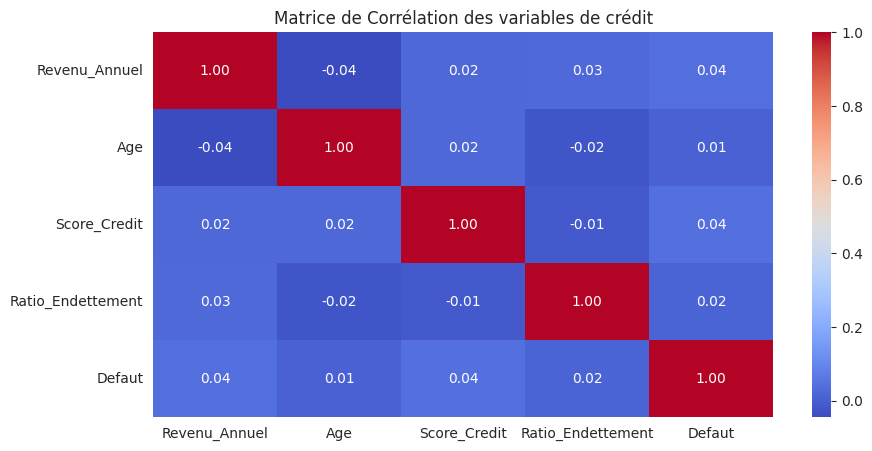

✅ Données prétraitées : 700 samples pour l'entraînement.


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve,
    roc_auc_score, auc, precision_score, recall_score,
    f1_score, accuracy_score, precision_recall_curve
)

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

print("="*80)
print("TP PARTIE 3 — K-NEAREST NEIGHBORS (KNN) ET ÉVALUATION MODÈLE")
print("Classification crédit et optimisation hyperparamètres")
print("="*80)

# ============================================================================
# QUESTION 3.1 — GÉNÉRATION ET EXPLORATION DU DATASET
# ============================================================================

# Simulation d'un dataset de scoring crédit pour la partie ML
np.random.seed(42)
n_samples = 1000

data = {
    'Revenu_Annuel': np.random.normal(45000, 15000, n_samples),
    'Age': np.random.randint(18, 75, n_samples),
    'Score_Credit': np.random.normal(600, 100, n_samples),
    'Ratio_Endettement': np.random.uniform(0.1, 0.6, n_samples),
    'Defaut': np.random.choice([0, 1], size=n_samples, p=[0.85, 0.15]) # 15% de défaut
}

df_credit = pd.DataFrame(data)

# Visualisation rapide
plt.figure(figsize=(10, 5))
sns.heatmap(df_credit.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation des variables de crédit")
plt.show()

# ============================================================================
# QUESTION 3.2 — PREPROCESSING
# ============================================================================

# 1. Séparation Features (X) / Target (y)
X = df_credit.drop('Defaut', axis=1)
y = df_credit['Defaut']

# 2. Split Stratifié (pour conserver la proportion de défauts dans train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Standardisation (Crucial pour KNN car il utilise des distances)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Données prétraitées : {X_train.shape[0]} samples pour l'entraînement.")